In [89]:
import pandas as pd
import numpy as np
import os

In [90]:
#settings
path = os.getcwd() + 'CryptoAPI.csv'

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [91]:
def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #This normalizes the data and makes it all pretty in a dataframe
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    #df =  pd.concat([df, df_new])
    
    if not os.path.isfile(path):
        df.to_csv(path, header = 'column_names')
    else:
        df.to_csv(path, mode = 'a', header = False)

In [92]:
#main
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api_runner() completed')
    sleep(60) # 1 minute
exit()

api_runner() completed
api_runner() completed
api_runner() completed
api_runner() completed
api_runner() completed


KeyboardInterrupt: 

In [108]:
#open file
df_open = pd.read_csv(path)
df_open

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19401293.00000,19401293.00000,False,NaN,1,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,25844.71014,14496356655.39836,13.63010,0.09332,-0.09261,-1.23003,-4.43693,-14.25074,6.88918,501420793920.59369,47.69550,542738912933.91998,NaN,2023-06-13T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:48:00.431101
1,1,1027,Ethereum,ETH,ethereum,7001,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120226966.54375,120226966.54375,True,NaN,2,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,1736.65033,6619510087.53682,8.57740,0.11189,-0.08129,-5.99498,-4.21948,-15.58468,7.20079,208792201287.82932,19.86930,208792201287.82999,NaN,2023-06-13T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:48:00.431101
2,2,825,Tether,USDT,tether,55473,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83495780837.66789,87083529362.35023,True,NaN,3,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,0.99982,24825166492.23751,14.74140,0.00846,-0.00819,-0.03244,-0.07914,-0.08541,-0.20153,83481091759.89001,7.94100,87068209106.37000,NaN,2023-06-13T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-13 20:48:00.431101
3,3,1839,BNB,BNB,bnb,1458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155854219.49887,155854219.49887,False,NaN,4,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,236.87656,843611549.79847,-10.64980,-0.32841,1.17381,-15.33010,-24.33845,-26.96919,-21.75822,36918210743.56477,3.51180,36918210743.56000,NaN,2023-06-13T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:48:00.431101
4,4,3408,USD Coin,USDC,usd-coin,12968,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28262369451.13065,28262369451.13065,False,NaN,5,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,1.00000,3729387358.03313,11.59870,0.00884,0.01631,-0.00403,-0.01158,0.01004,0.06251,28262287827.95131,2.68840,28262287827.95000,NaN,2023-06-13T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-13 20:48:00.431101
5,5,52,XRP,XRP,xrp,965,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,0.51166,2615858448.79955,122.75500,-0.33921,-1.25390,0.09965,19.65765,-0.45209,42.06750,26599725047.58624,2.53340,51166091630.92000,NaN,2023-06-13T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:48:00.431101
6,6,2010,Cardano,ADA,cardano,837,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34911011674.85900,35873953355.05600,False,NaN,7,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,0.27290,355274987.38799,-24.26310,0.58251,-1.53023,-22.18467,-26.44262,-36.29681,-14.25574,9527298408.85448,0.90620,12280607402.37000,NaN,2023-06-13T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:48:00.431101
7,7,74,Dogecoin,DOGE,dogecoin,728,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139752286383.70520,139752286383.70520,True,NaN,8,NaN,NaN,NaN,2023-06-13T16:46:00.000Z,0.06103,214649197.26930,-2.08480,0.08637,-0.37247,-10.78291,-15.65945,-29.36818,-10.73765,8528450139.41336,0.81130,8528450139.41000,NaN,2

In [109]:
df3 = df_open.groupby('name', sort=False)[[  'quote.USD.percent_change_1h',
                                             'quote.USD.percent_change_24h',
                                             'quote.USD.percent_change_7d',
                                             'quote.USD.percent_change_30d',
                                             'quote.USD.percent_change_60d',
                                             'quote.USD.percent_change_90d']].mean()
df4 = df3.stack()
df4 = df4.to_frame(name='values')
df4 = df4.reset_index()
df4 = df4.rename(columns={'level_1':'percent_change'})
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h',
                                             'quote.USD.percent_change_24h',
                                             'quote.USD.percent_change_7d',
                                             'quote.USD.percent_change_30d',
                                             'quote.USD.percent_change_60d',
                                             'quote.USD.percent_change_90d'],
                                            ['1h','24h','7d','30d','60d','90d'])
df4

,name,percent_change,values
0,Bitcoin,1h,0.22780
1,Bitcoin,24h,0.12260
2,Bitcoin,7d,-2.55900
3,Bitcoin,30d,-4.03446
4,Bitcoin,60d,-14.45418
5,Bitcoin,90d,6.11203
6,Ethereum,1h,0.23970
7,Ethereum,24h,0.17327
8,Ethereum,7d,-6.80430
9,Ethereum,30d,-3.63311


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

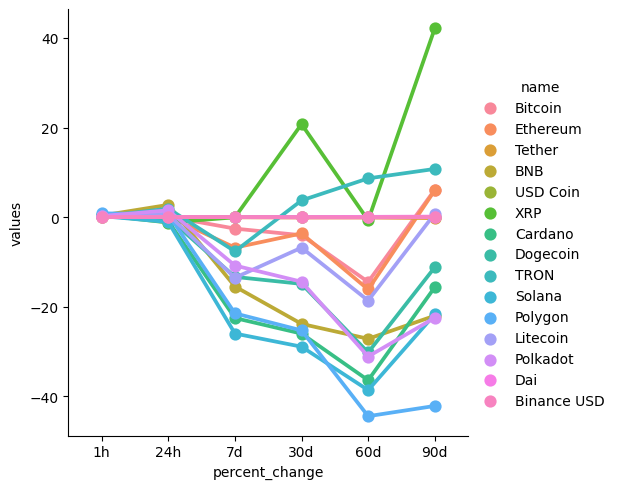

In [111]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [112]:
df10 = df_open[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,25844.71014,2023-06-13 20:48:00.431101
15,Bitcoin,25851.62596,2023-06-13 20:50:17.489456
30,Bitcoin,25887.34729,2023-06-13 22:59:04.932198
45,Bitcoin,25877.82814,2023-06-13 23:00:08.431180
60,Bitcoin,25882.89299,2023-06-13 23:01:08.798509
75,Bitcoin,25886.07877,2023-06-13 23:02:09.184828
90,Bitcoin,25886.62837,2023-06-13 23:03:09.581995


/var/folders/50/wfcv_4zx0917yzh38hjkl9480000gn/T/ipykernel_74390/3627868505.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([pd.to_datetime(tm, unit='ms').strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks],rotation=50)


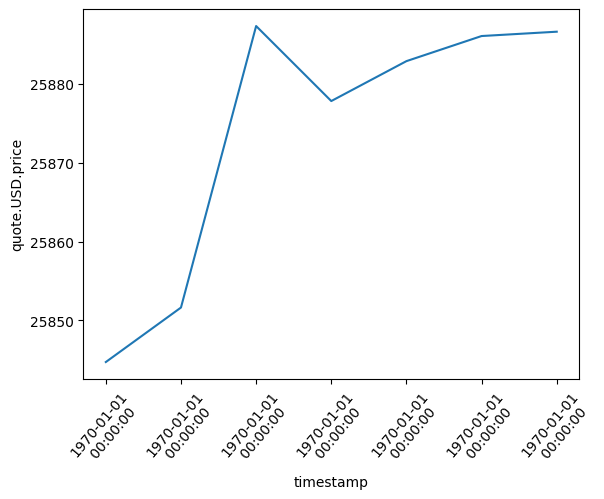

In [147]:
sns.lineplot(x='timestamp',y='quote.USD.price', data=df10)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
ax.set_xticklabels([pd.to_datetime(tm, unit='ms').strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks],rotation=50)

plt.show()

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

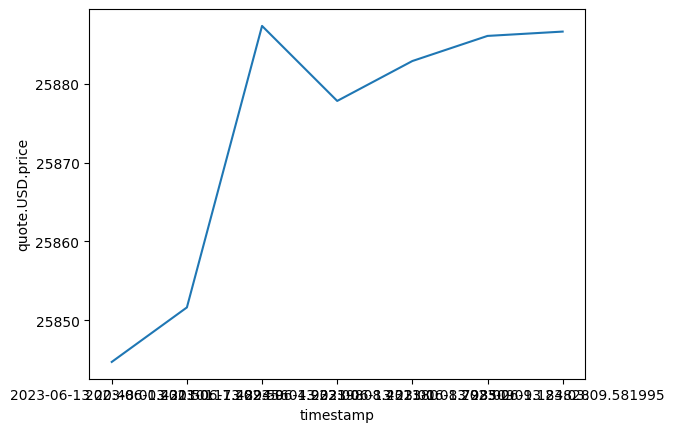

In [146]:
sns.lineplot(x='timestamp',y='quote.USD.price', data=df10)